In [102]:
# These are different types of linear regression we have done

In [121]:
import argparse
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import linear_model

In [122]:
def file_to_numpy(filename):
    """
    Read an input file and convert it to numpy
    """
    df = pd.read_csv(filename)
    return df.to_numpy()

file = pd.read_csv("train.csv")
y = file.iloc[:, 1:2]
x = pd.read_csv("x_transformed.csv")
x = x.iloc[:, 1:]

xHatNames = x.head(0)
xHatNames = xHatNames.T
x = x.to_numpy()
y = y.to_numpy()
y = y.T[0]
# print(y)
# print(len(x[0]))
# print(xHatNames)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40)

In [123]:
# simple linear regression

In [124]:
# we can clearly see that if we choose to use a simple linear regression model,
# maybe because there are too many features, the final r2 score is really strange,
# r2 should be a number between 0-1

model = LinearRegression()
model.fit(xTrain, yTrain)
predictions = model.predict(xTest)
print(r2_score(yTest, predictions))

-1.01949555358085e+23


In [125]:
# The above problem can be fixed by a PCA.
pca = sklearnPCA(.95)
pca.fit(xTrain)
xTrain_pca = pca.transform(xTrain)
xTest_pca = pca.transform(xTest)
clf = LinearRegression()
clf.fit(xTrain_pca, yTrain)

predictions = clf.predict(xTest_pca)
print("r2_score:")
print(r2_score(yTest, predictions))
print()
print("mean square error:")
print(mean_squared_error(yTest, predictions, squared=False))

r2_score:
0.48698119336577983

mean square error:
9.42424886214202


In [126]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model

# # use statsmodels 
# import statsmodels.api as sm
# model=sm.OLS(yTrain,xTrain)
# result=model.fit()
# print(result.summary())

print("coefficient of the model on principle components:")
print(clf.coef_)
coef = np.dot(np.abs(clf.coef_), pca.components_)
print()
print()
print("coefficient of the model on features:")
print(coef)
print()
print()
sort_index = np.argsort(coef)
print("index of the best 30 features")
print(sort_index[:30])

coefficient of the model on principle components:
[-1.28161472e+00  2.92254691e+00  1.25670590e+00  8.02606159e-01
  2.87328836e+00 -2.65752801e+00  3.46738425e+00 -6.37560196e-01
  1.76757602e+00 -4.74866173e+00  1.91396584e+00  1.97698371e+00
  5.23226185e-01  3.09390057e-01  9.95933584e-01 -6.03119061e-02
  1.31655842e+00 -2.28704097e-01 -9.50295642e-01 -1.33288498e+00
  1.61293147e+00 -5.93101792e-01  3.42882589e-01  5.24015892e-01
 -9.29735926e-01  1.31965078e-01 -1.14246471e+00 -2.93374503e-01
 -5.69705851e-01  1.32294767e+00  1.04406457e+00  5.79274060e-01
 -3.69196774e-01  8.85551900e-02  3.76352564e-01  7.13865510e-01
 -6.43666703e-01 -1.45237982e+00 -6.85414679e-01 -2.04381338e-01
  2.21956394e+00  1.11383482e+00  1.90577336e-01 -1.70323676e+00
  7.52865176e-01  8.47347159e-01 -1.02320820e-01  2.77434538e-01
 -1.47733084e+00  1.97781610e+00  8.59241975e-01  1.16225781e+00
 -1.67832736e+00  1.28019097e+00 -1.29851199e+00  6.25218171e-01
 -1.89593502e+00 -7.31042780e-01 -3.1639

number of principle components
128
components:
[[-1.54151262e-03  6.42158236e-18  5.56721246e-19 ...  9.32046417e-04
   0.00000000e+00 -5.16207737e-04]
 [-7.58996145e-03  4.84533384e-17  2.74531243e-18 ...  1.24560578e-03
  -0.00000000e+00 -5.63773222e-05]
 [ 9.46955925e-03 -4.58376373e-17  5.41575408e-18 ...  2.44309151e-03
  -0.00000000e+00 -1.10146914e-04]
 ...
 [-2.09784616e-02 -2.91223180e-17 -1.29815730e-17 ... -8.49363488e-03
  -0.00000000e+00 -1.22240151e-03]
 [-1.14813863e-02 -5.41570212e-18  2.33629841e-18 ... -1.82954071e-03
  -0.00000000e+00  2.05444832e-03]
 [ 1.42131717e-02 -6.08943082e-17  3.53994934e-17 ... -1.60491869e-02
  -0.00000000e+00  5.53350652e-03]]
explained variances:
[3.1926613  2.21953257 2.14452569 1.67218931 1.39792233 1.19025225
 1.03067831 0.83079486 0.76272408 0.63700013 0.6056779  0.4853757
 0.45332018 0.414923   0.39753545 0.38435744 0.37340158 0.33437749
 0.28920402 0.27898955 0.27413447 0.25039101 0.23695432 0.22871263
 0.21946571 0.21051649 0.2017

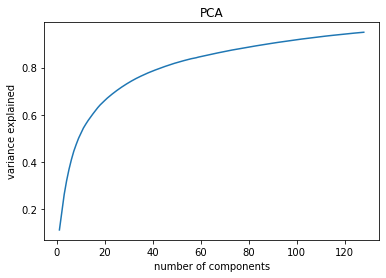

In [109]:
# the detials of a 95% PCA
i = 1
variance = []
k = []
pca = PCA(n_components = 1)
while(True):
    pca = sklearnPCA(n_components=i)
    xTrainPca= pca.fit_transform(xTrain)
    xTestPca = pca.fit_transform(xTest)
    variance.append(np.sum(pca.explained_variance_ratio_))
    k.append(i)
    if(np.sum(pca.explained_variance_ratio_) >= 0.95):
        break
    i += 1

print("number of principle components")
print(i)
print("components:")
print(pca.components_)
print("explained variances:")
print(pca.explained_variance_)
print("explained variance ratios")
print(pca.explained_variance_ratio_)

plt.plot(k, variance)
plt.xlabel("number of components")
plt.ylabel("variance explained")
plt.title("PCA")
plt.show()

In [110]:
# Lasso

In [120]:
import warnings
warnings.filterwarnings("ignore")
clf = GridSearchCV(
        linear_model.Lasso(), 
        [{'alpha': [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.1, 0.2, 0.3, 0.5, 0.7]}], cv=5, scoring='r2')
clf.fit(xTrain, yTrain)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

clf = linear_model.Lasso(alpha=0.05)
clf.fit(xTrain, yTrain)
yHat = clf.predict(xTest)
print("r2_score:")
print(r2_score(yTest, yHat))
print("mean square error:")
print(mean_squared_error(yTest, yHat, squared=False))

0.562 for {'alpha': 0.005}
0.572 for {'alpha': 0.01}
0.581 for {'alpha': 0.02}
0.583 for {'alpha': 0.03}
0.583 for {'alpha': 0.04}
0.582 for {'alpha': 0.05}
0.580 for {'alpha': 0.06}
0.576 for {'alpha': 0.07}
0.567 for {'alpha': 0.1}
0.549 for {'alpha': 0.2}
0.526 for {'alpha': 0.3}
0.468 for {'alpha': 0.5}
0.437 for {'alpha': 0.7}
Best parameters set found on development set:

{'alpha': 0.04}
r2_score:
0.5015160183665348
mean square error:
9.289785929115824


In [112]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model
print("coefficient of the model on features:")
print(clf.coef_)
print()
sort_index = np.argsort(np.abs(clf.coef_))
print("index of the best 30 features")
print(sort_index[:30])

coefficient of the model on features:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.62567723e+00
  1.85148752e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.62804025e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.62380901e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.54454042e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.94803195e-01 -0.00000000e+00 -0.00000000e+00  2.14978156e+00
  2.43128981e+00  3.88122902e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.

In [113]:
# Bayesian Ridge

In [114]:
clf = GridSearchCV(
        linear_model.BayesianRidge(), 
        [{'normalize': [True, False]}], cv=5, scoring='r2')
clf.fit(xTrain, yTrain)
means = clf.cv_results_['mean_test_score']
for mean, params in zip(means, clf.cv_results_['params']):
    print("%0.3f for %r" % (mean, params))
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
clf = linear_model.BayesianRidge(normalize = False)
clf.fit(xTrain, yTrain)
yHat = clf.predict(xTest)
print("r2_score:")
print(r2_score(yTest, yHat))
print("mean square error:")
print(mean_squared_error(yTest, yHat, squared=False))

0.569 for {'normalize': True}
0.570 for {'normalize': False}
Best parameters set found on development set:

{'normalize': False}
r2_score:
0.4978006881251549
mean square error:
9.32434125167071


In [115]:
# model analysis
# We will choose 50 features with the largest constants in linear regression model
# They are the 50 most important features in the model
print("coefficient of the model on features:")
print(clf.coef_)
print()
sort_index = np.argsort(np.abs(clf.coef_))
print("index of the best 30 features")
print(sort_index[:30])

coefficient of the model on features:
[ 2.53405995e-01  2.03598380e+00  5.63665598e-01 -9.60749062e-14
  6.34004240e-01  7.81076351e-01  4.90224417e-01 -1.55046104e+00
  1.98864836e+00  6.83555812e-01 -9.16246577e-01 -2.13475971e-01
  4.47097576e-01 -1.22203837e+00  1.28582452e-01  8.08060051e-01
  1.39495729e+00  2.65931782e-01  7.16651481e-01 -1.77318719e+00
 -1.76335109e+00 -4.81510412e-01 -1.08172089e-01 -4.63444483e-01
 -4.44065811e-03 -1.62669421e+00  1.14298627e+00 -1.24716147e+00
 -1.08965758e-01 -1.34598341e+00 -1.56051274e-01  7.11413150e-01
 -3.87497837e-01 -1.84921043e+00 -3.22698535e-01  3.62901287e-01
 -1.69006938e+00 -4.58178364e-02  2.62163064e-01  1.11132145e+00
 -1.61871275e+00 -8.55262486e-01 -4.64580490e-01  2.47241632e+00
  2.93469955e+00  8.00606296e-01 -7.75318855e-01  2.22720962e-01
  1.16120177e-01 -1.41650560e-01  3.43229199e-01  4.23613902e-01
 -5.90450325e-02 -4.29648571e-01  1.26404792e+00  3.11296853e-02
  1.11202812e+00  1.56421438e-01 -1.10289070e-02 -1.